<a href="https://colab.research.google.com/github/rajaganesh1357/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,  roc_auc_score)

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/rajaganesh1357/Dataset/main/linear%20regression%20dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [54]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [55]:
df.drop(165,inplace=True)
df.reset_index(inplace=True)

In [56]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [57]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [58]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

In [59]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [60]:
import re
def Remove_Extra_Space(x):
  return (re.sub(' +', ' ', x).strip())

In [61]:
df['Classes'] = df['Classes'].apply(Remove_Extra_Space)

In [62]:
df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

In [63]:
df['Region'].unique()

array(['Bejaia', 'Sidi-Bel Abbes'], dtype=object)

In [64]:
df['Region'] = df['Region'].map({'Bejaia' : 0, 'Sidi-Bel Abbes': 1})

In [65]:
df.isnull().sum()

index          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
date           0
dtype: int64

In [66]:
df.dtypes

index                   int64
Temperature             int64
RH                      int64
Ws                      int64
Rain                  float64
FFMC                  float64
DMC                   float64
DC                     object
ISI                   float64
BUI                   float64
FWI                    object
Classes                 int64
Region                  int64
date           datetime64[ns]
dtype: object

In [67]:
df.describe()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,121.320988,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,4.742387,16.690535,0.563786,0.497942
std,70.671074,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,4.154234,14.228421,0.496938,0.501028
min,0.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000,0.000000
25%,60.500000,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,1.400000,6.000000,0.000000,0.000000
50%,121.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,3.500000,12.400000,1.000000,0.000000
75%,182.500000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,7.250000,22.650000,1.000000,1.000000
max,243.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000,1.000000


In [68]:
df.nunique()

index          243
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            126
Classes          2
Region           2
date           122
dtype: int64

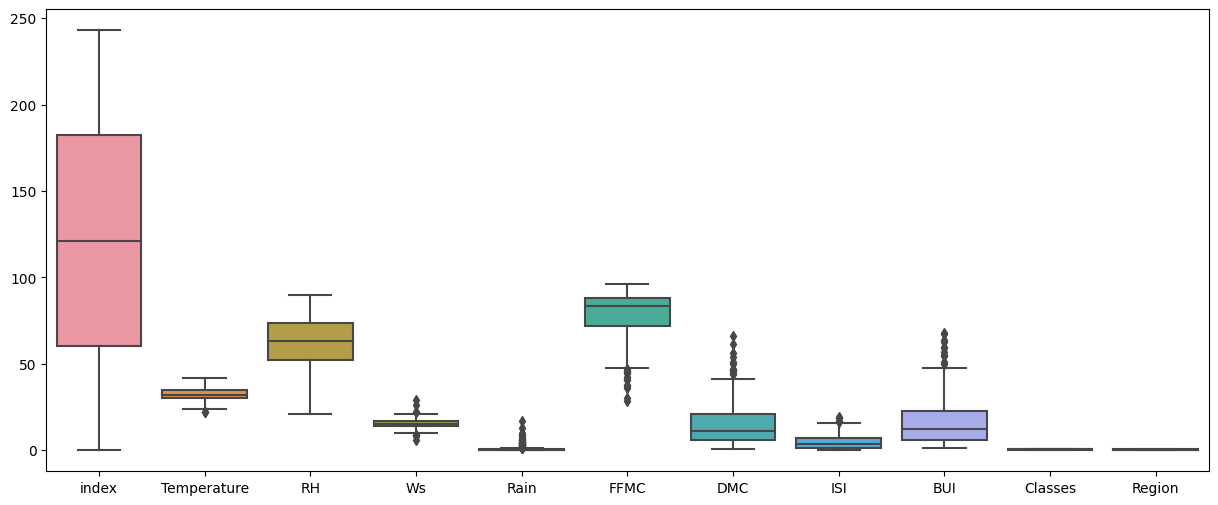

In [69]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.show()

In [70]:
X = df[['Temperature', 'RH', 'Rain', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = df[['Classes']]

In [71]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [73]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
y_pred = log_reg.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
auc = roc_auc_score(y_test, y_pred)
print(f" Confusion Matrix : {conf_mat}")
print(f" Accuracy : {accuracy*100}")
print(f" Precision : {Precision*100}")
print(f" Recall : {Recall*100}")
print(f" F1_Score : {F1_Score*100}")
print(f" AUC : {auc*100}")

 Confusion Matrix : [[32  1]
 [ 1 47]]
 Accuracy : 97.53086419753086
 Precision : 96.96969696969697
 Recall : 96.96969696969697
 F1_Score : 96.96969696969697
 AUC : 97.44318181818181
